# 2487 Machine Learning Assignment 4
#Inside Out
![](https://upload.wikimedia.org/wikipedia/en/0/0a/Inside_Out_%282015_film%29_poster.jpg)




Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise.

Your task is to use deep learning techniques to classify the Tweets into the corresponding emotions:

In [4]:
!pip install datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [5]:
from datasets import load_dataset

In [6]:
emotion = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Data Fields

The data fields are:

- text: a string feature.
- label: a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5).

In [ ]:
emotion['train'][0]['text'],emotion['train'][0]['label'],emotion['train'].features

('i didnt feel humiliated',
 0,
 {'text': Value(dtype='string', id=None),
  'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)})

In [ ]:
emotion['validation'][0]['text'],emotion['validation'][0]['label']

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
emotion['test'][0]['text'],emotion['test'][0]['label']

('im feeling rather rotten so im not very ambitious right now', 0)

split: with a total of 20_000 examples split into train, validation and split

In [ ]:
emotion['train'].shape, emotion['validation'].shape, emotion['test'].shape

((16000, 2), (2000, 2), (2000, 2))

## Question 1 (40 points)
Check the distribution of the text length in the data, build the simple RNN model and LSTM model with one layer, and two stacked layers, respectively and compare their performance. You may choose to pad or truncate the input sequence to be the number closest to 128, 256, 512, etc. You could train at most for 10 epochs if you find it takes much time.

In [ ]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Embedding
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
import gensim.downloader as api

In [ ]:
# Load dataset with trust_remote_code=True to avoid future warnings
dataset = load_dataset('dair-ai/emotion', trust_remote_code=True)

# Convert the dataset to a pandas DataFrame
df_train = pd.DataFrame(dataset['train'])

In [ ]:
# Check distribution of text length
text_lengths = df_train['text'].str.len()
plt.hist(text_lengths, bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

seq_length = 128

In [ ]:
# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['text'])
sequences = tokenizer.texts_to_sequences(df_train['text'])
X_train = pad_sequences(sequences, maxlen=seq_length)
y_train = df_train['label'].values

In [ ]:
# Define a simple RNN model
rnn_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=seq_length),
    SimpleRNN(64),
    Dense(6, activation='softmax')
])

# Compile the simple RNN model
optimizer = Adam(learning_rate=0.001)
rnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define LSTM (1 Layer) model
lstm_model_1 = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=seq_length),
    LSTM(64),
    Dense(6, activation='softmax')
])

# Compile LSTM (1 Layer) model
lstm_model_1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define LSTM (2 Layers) model
lstm_model_2 = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=seq_length),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(6, activation='softmax')
])

# Compile LSTM (2 Layers) model
lstm_model_2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the simple RNN model
history_rnn = rnn_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Train the LSTM (1 Layer) model
history_lstm_1 = lstm_model_1.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Train the LSTM (2 Layers) model
history_lstm_2 = lstm_model_2.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 31s 74ms/step - loss: 1.5291 - accuracy: 0.3753 - val_loss: 1.3428 - val_accuracy: 0.5034
Epoch 2/10
400/400 [==============================] - 22s 54ms/step - loss: 0.7414 - accuracy: 0.7538 - val_loss: 0.6671 - val_accuracy: 0.7831
Epoch 3/10
400/400 [==============================] - 19s 47ms/step - loss: 0.2742 - accuracy: 0.9197 - val_loss: 0.8183 - val_accuracy: 0.7256
Epoch 4/10
400/400 [==============================] - 21s 51ms/step - loss: 0.1395 - accuracy: 0.9605 - val_loss: 0.9845 - val_accuracy: 0.6878
Epoch 5/10
400/400 [==============================] - 18s 45ms/step - loss: 0.0975 - accuracy: 0.9731 - val_loss: 0.8113 - val_accuracy: 0.7713
Epoch 6/10
400/400 [==============================] - 18s 46ms/step - loss: 0.0349 - accuracy: 0.9920 - val_loss: 0.8814 - val_accuracy: 0.7597
Epoch 7/10
400/400 [==============================] - 20s 50ms/step - loss: 0.0187 - accuracy: 0.9959 - val_loss: 0.8815 - val_accuracy:

In [ ]:
# Evaluate the simple RNN model
rnn_eval = rnn_model.evaluate(X_train, y_train, verbose=0)

# Evaluate the LSTM (1 Layer) model
lstm_1_eval = lstm_model_1.evaluate(X_train, y_train, verbose=0)

# Evaluate the LSTM (2 Layers) model
lstm_2_eval = lstm_model_2.evaluate(X_train, y_train, verbose=0)

# Print evaluation results
print(f"Simple RNN Model Accuracy: {rnn_eval[1]:.4f}")
print(f"LSTM (1 Layer) Model Accuracy: {lstm_1_eval[1]:.4f}")
print(f"LSTM (2 Layers) Model Accuracy: {lstm_2_eval[1]:.4f}")

Simple RNN Model Accuracy: 0.9451
LSTM (1 Layer) Model Accuracy: 0.9764
LSTM (2 Layers) Model Accuracy: 0.9805


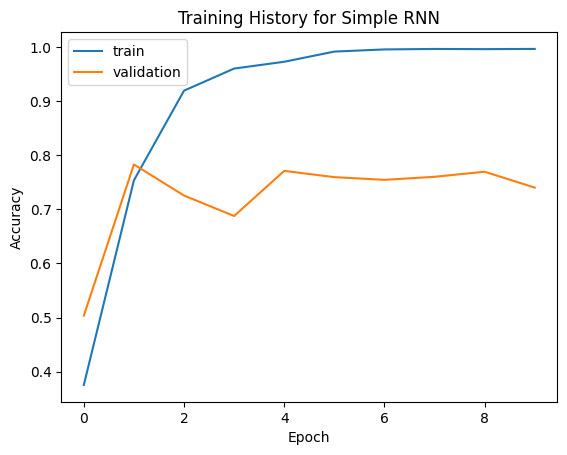

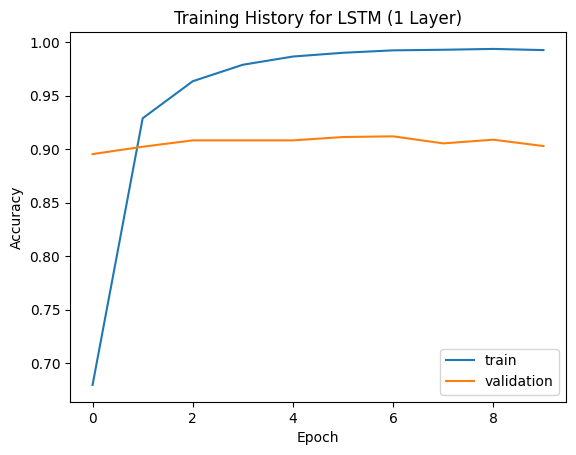

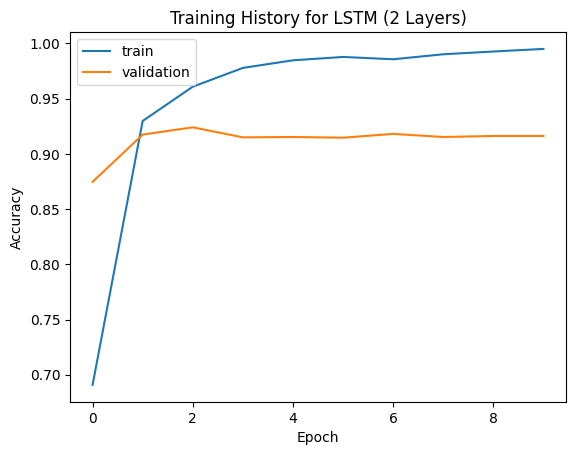

In [ ]:
# Plot training history for each model
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history_rnn, 'Training History for Simple RNN')
plot_history(history_lstm_1, 'Training History for LSTM (1 Layer)')
plot_history(history_lstm_2, 'Training History for LSTM (2 Layers)')

I will briefly explain what is done in these snippets of code above:

- Texts are tokenized and padded to a uniform length of 128 characters to prepare the input for neural networks.

- Three models are defined and trained: a Simple RNN, a single-layer LSTM, and a two-layer LSTM.

- Each model consists of an Embedding layer for text input, the respective RNN layers, and a Dense output layer with softmax activation for class prediction.
The models are trained using the Adam optimizer and a sparse categorical cross-entropy loss function.

- The training output shows the performance of each model over 10 epochs. Each model's accuracy on both training and validation sets is logged per epoch.
The validation accuracy provides insight into how well the models generalize to unseen data.

Post-training, the models are evaluated on the entire training dataset:
- Simple RNN Model Accuracy: 94.51%
- LSTM (1 Layer) Model Accuracy: 97.64%
- LSTM (2 Layers) Model Accuracy: 98.05%

These results highlight that LSTM models, particularly with more layers, tend to perform better, likely due to their ability to capture longer dependencies in the text without suffering from vanishing gradient issues common in Simple RNNs.

Training and validation accuracy plots are generated for each model, illustrating the training history and convergence behavior.

From the graph analysis:

- The Simple RNN shows signs of overfitting with higher training accuracy than validation accuracy.

- Both LSTM models exhibit strong performance with high training and validation accuracies. However, the two-layer LSTM model shows the highest overall accuracy, suggesting improved learning capability.

## Question 2 (30 points)

Now download the pretrained word embedding models from Gensim library with different embedding size 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200'. Show the most similar words for `anger, fear, joy, love, sadness, and surprise`. Use the best performing model from the Question 1 and replace the embedding layer with pretrained word embeddings with different embedding size. Explain whether these pretrained embedding would imporve the model performance.


In [9]:
!pip install gensim

In [10]:
import gensim.downloader as api

# Load different sizes of GloVe embeddings
glove_twitter_25 = api.load("glove-twitter-25")
glove_twitter_50 = api.load("glove-twitter-50")
glove_twitter_100 = api.load("glove-twitter-100")
glove_twitter_200 = api.load("glove-twitter-200")

# Function to display most similar words for a set of emotions
def display_similar_words(model, emotions):
    for emotion in emotions:
        print(f"Most similar words for {emotion} in {model}:")
        similar_words = model.most_similar(emotion)
        for word, similarity in similar_words:
            print(f"  {word}: {similarity:.4f}")
        print()

emotions = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

# Display similar words using different embeddings
display_similar_words(glove_twitter_25, emotions)
display_similar_words(glove_twitter_50, emotions)
display_similar_words(glove_twitter_100, emotions)
display_similar_words(glove_twitter_200, emotions)


[==================================================] 100.0% 104.8/104.8MB downloaded
[==================================================] 100.0% 199.5/199.5MB downloaded
[==================================================] 100.0% 387.1/387.1MB downloaded
[==================================================] 100.0% 758.5/758.5MB downloaded
Most similar words for anger in KeyedVectors<vector_size=25, 1193514 keys>:
  fear: 0.9506
  frustration: 0.9351
  emotions: 0.9122
  pain: 0.9062
  emotion: 0.9021
  hatred: 0.9015
  enemy: 0.9008
  confusion: 0.8989
  loneliness: 0.8957
  jealousy: 0.8940

Most similar words for fear in KeyedVectors<vector_size=25, 1193514 keys>:
  anger: 0.9506
  enemy: 0.9230
  afraid: 0.9117
  destroy: 0.9106
  fears: 0.9076
  lies: 0.8961
  faith: 0.8940
  hatred: 0.8898
  overcome: 0.8888
  truth: 0.8887

Most similar words for joy in KeyedVectors<vector_size=25, 1193514 keys>:
  dreams: 0.9212
  faith: 0.9143
  grace: 0.9103
  happiness: 0.9086
  spirit: 0.9065

In [19]:
# Model with glove-twitter 25

# Load the dataset with trust_remote_code to suppress the warning
dataset = load_dataset('emotion', trust_remote_code=True)

train_val_split = dataset['train'].train_test_split(test_size=0.1)

train_texts = train_val_split['train']['text']
train_labels = train_val_split['train']['label']
val_texts = train_val_split['test']['text']
val_labels = train_val_split['test']['label']

# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)

# Load pretrained GloVe embeddings
glove_twitter = api.load("glove-twitter-25")

# Create the embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, glove_twitter.vector_size))
for word, index in tokenizer.word_index.items():
    # Check if the word is in the model's vocabulary
    if word in glove_twitter:
        embedding_vector = glove_twitter[word]
        embedding_matrix[index] = embedding_vector

# Define the model architecture
def create_model(embedding_matrix):
    model = Sequential([
        Input(shape=(None,)),
        Embedding(input_dim=len(tokenizer.word_index) + 1,
                  output_dim=embedding_matrix.shape[1],
                  weights=[embedding_matrix],
                  trainable=False),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dense(len(set(train_labels)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model(embedding_matrix)

# Convert texts to sequences and pad them
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
train_padded = pad_sequences(train_sequences, maxlen=128)  # Example length
val_padded = pad_sequences(val_sequences, maxlen=128)

# Train the model
model.fit(train_padded, np.array(train_labels), validation_data=(val_padded, np.array(val_labels)), epochs=10, batch_size=64)

Epoch 1/10
225/225 [==============================] - 44s 178ms/step - loss: 1.4837 - accuracy: 0.4194 - val_loss: 1.3573 - val_accuracy: 0.4831
Epoch 2/10
225/225 [==============================] - 39s 174ms/step - loss: 1.3066 - accuracy: 0.4940 - val_loss: 1.2556 - val_accuracy: 0.5088
Epoch 3/10
225/225 [==============================] - 37s 166ms/step - loss: 1.1787 - accuracy: 0.5384 - val_loss: 1.1216 - val_accuracy: 0.5544
Epoch 4/10
225/225 [==============================] - 39s 175ms/step - loss: 1.0880 - accuracy: 0.5718 - val_loss: 1.0760 - val_accuracy: 0.5569
Epoch 5/10
225/225 [==============================] - 38s 170ms/step - loss: 1.0035 - accuracy: 0.6042 - val_loss: 0.9874 - val_accuracy: 0.6137
Epoch 6/10
225/225 [==============================] - 38s 167ms/step - loss: 0.9132 - accuracy: 0.6394 - val_loss: 0.9249 - val_accuracy: 0.6350
Epoch 7/10
225/225 [==============================] - 37s 166ms/step - loss: 0.8375 - accuracy: 0.6747 - val_loss: 0.8463 - val_ac

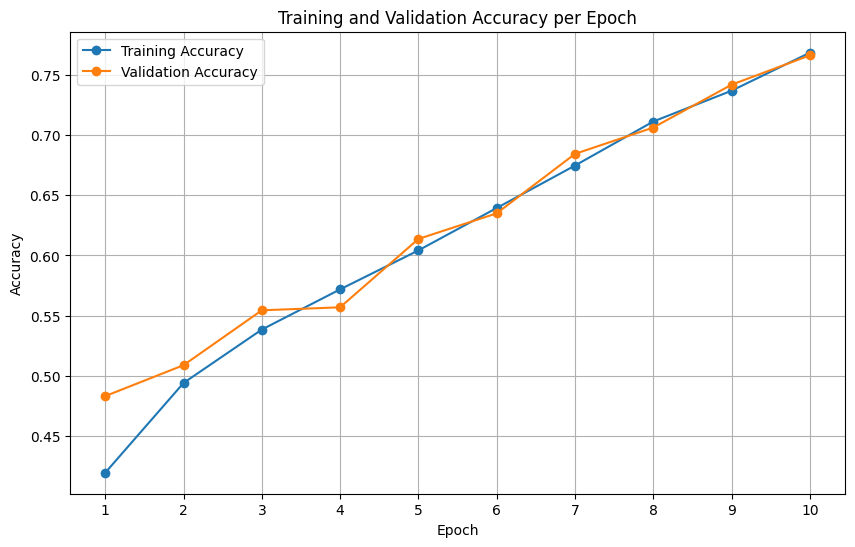

In [22]:
import matplotlib.pyplot as plt

# Epochs from 1 to 10
epochs = list(range(1, 11))

# Training accuracy for each epoch
train_accuracy = [
    0.4194, 0.4940, 0.5384, 0.5718, 0.6042, 0.6394, 0.6747, 0.7113, 0.7369, 0.7685
]

# Validation accuracy for each epoch
val_accuracy = [
    0.4831, 0.5088, 0.5544, 0.5569, 0.6137, 0.6350, 0.6844, 0.7063, 0.7419, 0.7663
]

# Create a plot for the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # Ensure only integer labels are used for epochs
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Model with glove-twitter-50

# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)

# Load pretrained GloVe embeddings
glove_twitter = api.load("glove-twitter-50")

# Create the embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, glove_twitter.vector_size))
for word, index in tokenizer.word_index.items():
    # Check if the word is in the model's vocabulary
    if word in glove_twitter:
        embedding_vector = glove_twitter[word]
        embedding_matrix[index] = embedding_vector

# Define the model architecture
def create_model(embedding_matrix):
    model = Sequential([
        Input(shape=(None,)),
        Embedding(input_dim=len(tokenizer.word_index) + 1,
                  output_dim=embedding_matrix.shape[1],
                  weights=[embedding_matrix],
                  trainable=False),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dense(len(set(train_labels)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model(embedding_matrix)

# Convert texts to sequences and pad them
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
train_padded = pad_sequences(train_sequences, maxlen=128)
val_padded = pad_sequences(val_sequences, maxlen=128)

# Train the model
model.fit(train_padded, np.array(train_labels), validation_data=(val_padded, np.array(val_labels)), epochs=10, batch_size=64)

Epoch 1/10
225/225 [==============================] - 50s 182ms/step - loss: 1.4258 - accuracy: 0.4553 - val_loss: 1.2994 - val_accuracy: 0.4944
Epoch 2/10
225/225 [==============================] - 37s 166ms/step - loss: 1.1643 - accuracy: 0.5612 - val_loss: 1.0677 - val_accuracy: 0.6012
Epoch 3/10
225/225 [==============================] - 40s 177ms/step - loss: 0.9654 - accuracy: 0.6449 - val_loss: 0.8994 - val_accuracy: 0.6656
Epoch 4/10
225/225 [==============================] - 41s 184ms/step - loss: 0.8046 - accuracy: 0.7051 - val_loss: 0.7707 - val_accuracy: 0.7219
Epoch 5/10
225/225 [==============================] - 39s 175ms/step - loss: 0.6609 - accuracy: 0.7549 - val_loss: 0.6847 - val_accuracy: 0.7581
Epoch 6/10
225/225 [==============================] - 39s 172ms/step - loss: 0.5566 - accuracy: 0.7971 - val_loss: 0.5738 - val_accuracy: 0.7962
Epoch 7/10
225/225 [==============================] - 40s 177ms/step - loss: 0.4674 - accuracy: 0.8333 - val_loss: 0.5343 - val_ac

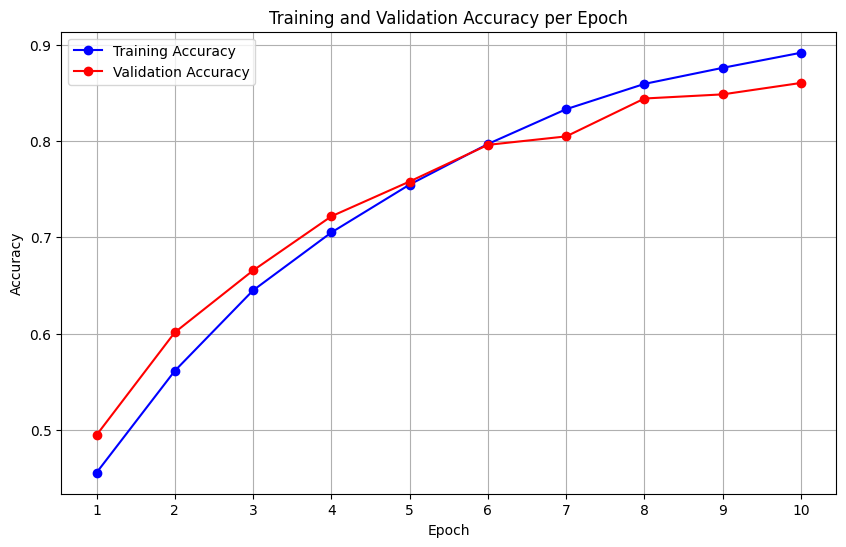

In [24]:
# Epochs from 1 to 10
epochs = list(range(1, 11))

# Training accuracy for each epoch
train_accuracy = [
    0.4553, 0.5612, 0.6449, 0.7051, 0.7549, 0.7971, 0.8333, 0.8596, 0.8763, 0.8920
]

# Validation accuracy for each epoch
val_accuracy = [
    0.4944, 0.6012, 0.6656, 0.7219, 0.7581, 0.7962, 0.8050, 0.8444, 0.8487, 0.8606
]

# Create a plot for the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', color='red')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Model with glove-twitter 100

# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)

# Load pretrained GloVe embeddings
glove_twitter = api.load("glove-twitter-100")

# Create the embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, glove_twitter.vector_size))
for word, index in tokenizer.word_index.items():
    # Check if the word is in the model's vocabulary
    if word in glove_twitter:
        embedding_vector = glove_twitter[word]
        embedding_matrix[index] = embedding_vector

# Define the model architecture
def create_model(embedding_matrix):
    model = Sequential([
        Input(shape=(None,)),
        Embedding(input_dim=len(tokenizer.word_index) + 1,
                  output_dim=embedding_matrix.shape[1],
                  weights=[embedding_matrix],
                  trainable=False),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dense(len(set(train_labels)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model(embedding_matrix)

# Convert texts to sequences and pad them
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
train_padded = pad_sequences(train_sequences, maxlen=128)
val_padded = pad_sequences(val_sequences, maxlen=128)

# Train the model
model.fit(train_padded, np.array(train_labels), validation_data=(val_padded, np.array(val_labels)), epochs=10, batch_size=64)

Epoch 1/10
225/225 [==============================] - 54s 219ms/step - loss: 1.3242 - accuracy: 0.4939 - val_loss: 1.0512 - val_accuracy: 0.6144
Epoch 2/10
225/225 [==============================] - 55s 242ms/step - loss: 0.8624 - accuracy: 0.6836 - val_loss: 0.7197 - val_accuracy: 0.7419
Epoch 3/10
225/225 [==============================] - 49s 217ms/step - loss: 0.6030 - accuracy: 0.7841 - val_loss: 0.5320 - val_accuracy: 0.8094
Epoch 4/10
225/225 [==============================] - 52s 230ms/step - loss: 0.4374 - accuracy: 0.8472 - val_loss: 0.4300 - val_accuracy: 0.8556
Epoch 5/10
225/225 [==============================] - 51s 226ms/step - loss: 0.3400 - accuracy: 0.8787 - val_loss: 0.3644 - val_accuracy: 0.8788
Epoch 6/10
225/225 [==============================] - 49s 219ms/step - loss: 0.2654 - accuracy: 0.9056 - val_loss: 0.3066 - val_accuracy: 0.8938
Epoch 7/10
225/225 [==============================] - 49s 217ms/step - loss: 0.2303 - accuracy: 0.9142 - val_loss: 0.2773 - val_ac

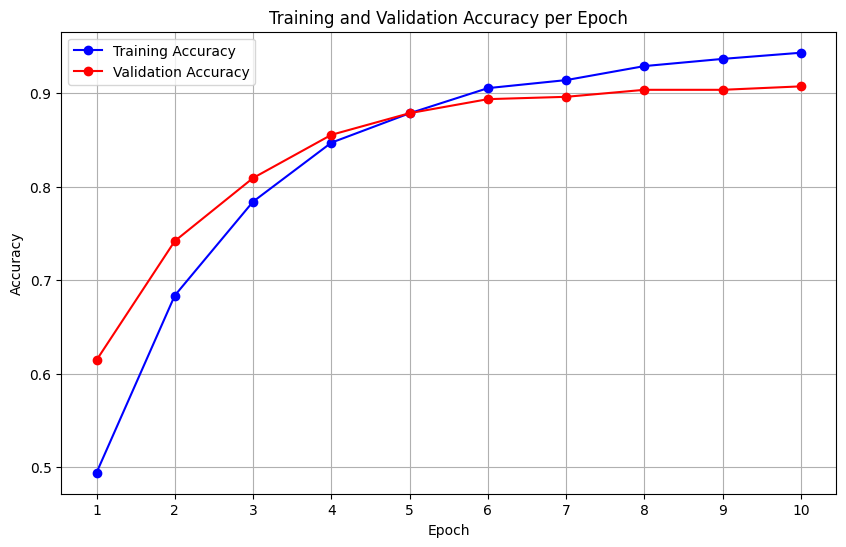

In [26]:
# Epochs from 1 to 10
epochs = list(range(1, 11))

# Training accuracy for each epoch
train_accuracy = [
    0.4939, 0.6836, 0.7841, 0.8472, 0.8787, 0.9056, 0.9142, 0.9292, 0.9369, 0.9435
]

# Validation accuracy for each epoch
val_accuracy = [
    0.6144, 0.7419, 0.8094, 0.8556, 0.8788, 0.8938, 0.8963, 0.9038, 0.9038, 0.9075
]

# Create a plot for the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', color='red')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Model with glove-twitter 200

# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)

# Load pretrained GloVe embeddings
glove_twitter = api.load("glove-twitter-200")

# Create the embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, glove_twitter.vector_size))
for word, index in tokenizer.word_index.items():
    # Check if the word is in the model's vocabulary
    if word in glove_twitter:
        embedding_vector = glove_twitter[word]
        embedding_matrix[index] = embedding_vector

# Define the model architecture
def create_model(embedding_matrix):
    model = Sequential([
        Input(shape=(None,)),
        Embedding(input_dim=len(tokenizer.word_index) + 1,
                  output_dim=embedding_matrix.shape[1],
                  weights=[embedding_matrix],
                  trainable=False),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dense(len(set(train_labels)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model(embedding_matrix)

# Convert texts to sequences and pad them
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
train_padded = pad_sequences(train_sequences, maxlen=128)
val_padded = pad_sequences(val_sequences, maxlen=128)

# Train the model
model.fit(train_padded, np.array(train_labels), validation_data=(val_padded, np.array(val_labels)), epochs=10, batch_size=64)

Epoch 1/10
225/225 [==============================] - 64s 267ms/step - loss: 1.2708 - accuracy: 0.5251 - val_loss: 0.9068 - val_accuracy: 0.6831
Epoch 2/10
225/225 [==============================] - 58s 257ms/step - loss: 0.6781 - accuracy: 0.7674 - val_loss: 0.5180 - val_accuracy: 0.8206
Epoch 3/10
225/225 [==============================] - 57s 255ms/step - loss: 0.4056 - accuracy: 0.8585 - val_loss: 0.3830 - val_accuracy: 0.8669
Epoch 4/10
225/225 [==============================] - 55s 247ms/step - loss: 0.2827 - accuracy: 0.8997 - val_loss: 0.3177 - val_accuracy: 0.8888
Epoch 5/10
225/225 [==============================] - 55s 247ms/step - loss: 0.2170 - accuracy: 0.9186 - val_loss: 0.2353 - val_accuracy: 0.9131
Epoch 6/10
225/225 [==============================] - 57s 255ms/step - loss: 0.1708 - accuracy: 0.9326 - val_loss: 0.2417 - val_accuracy: 0.9087
Epoch 7/10
225/225 [==============================] - 57s 255ms/step - loss: 0.1452 - accuracy: 0.9413 - val_loss: 0.2065 - val_ac

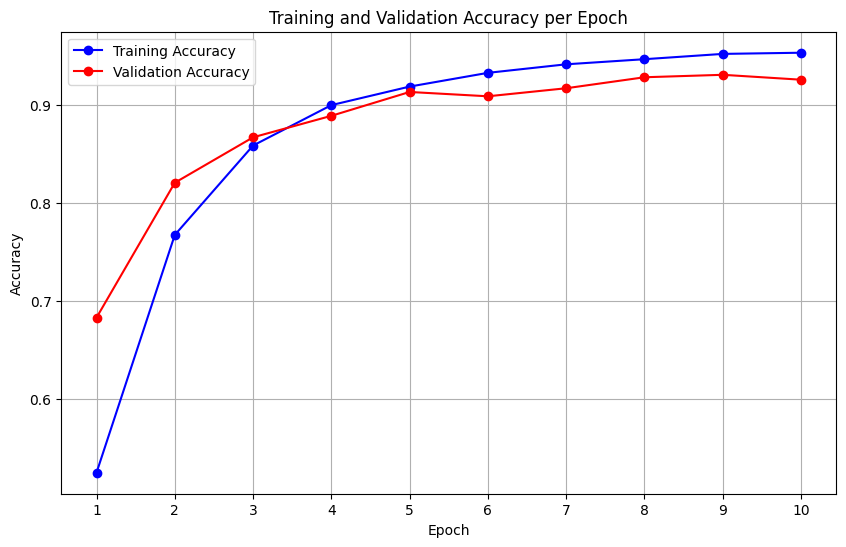

In [28]:
# Epochs from 1 to 10
epochs = list(range(1, 11))

# Training accuracy for each epoch
train_accuracy = [
    0.5251, 0.7674, 0.8585, 0.8997, 0.9186, 0.9326, 0.9413, 0.9465, 0.9519, 0.9531
]

# Validation accuracy for each epoch
val_accuracy = [
    0.6831, 0.8206, 0.8669, 0.8888, 0.9131, 0.9087, 0.9169, 0.9281, 0.9306, 0.9256
]

# Create a plot for the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', color='red')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # Ensure only integer labels are used for epochs
plt.legend()
plt.grid(True)
plt.show()


I will briefly explain what is done in these snippets of code above regarding Question 2:

The code starts to how the most similar words for anger, fear, joy, love, sadness, and surprise. Then, goes to the development of the models using the best performing model from question 1 which was the LSTM with two layers.

All the models using different sizes of GloVe embeddings demonstrate a consistent improvement in both training and validation accuracies over the epochs, indicating effective learning.

The model accuracy for both training and validation increases with the size of the embeddings. This suggests that larger embeddings capture more detailed semantic relationships, which contribute to better model performance.

- The GloVe-25 model starts with a training accuracy of around 42% and validation accuracy of around 48%, reaching training accuracy close to 77% and validation accuracy approximately 77% by the 10th epoch. This model shows a decent learning curve but starts from a relatively lower baseline, which might be due to the limited information contained in the smaller (25-dimensional) embeddings.

- The GloVe-50 model begins with higher initial accuracies (approximately 46% for training and 49% for validation) and shows a steeper learning curve, ending up with about 89% training and 86% validation accuracy. The improved performance indicates that doubling the embedding size significantly captures more useful features for the model.

- GloVe-100 shows even stronger performance, starting from about 49% in training accuracy and 61% in validation, and ends up at 94% and 91% respectively. The larger embedding size likely provides a richer representation, allowing for better differentiation and understanding of the input data.

- GloVe-200, the largest model, shows the best performance, starting from approximately 53% training and 68% validation accuracy, and finishing with 95% training and 93% validation accuracy. This model's high-dimensional embeddings provide the most comprehensive semantic understanding, reflected in its superior performance.

Conclusions on Pretrained Embeddings

- Using pretrained word embeddings generally seems to improve the performance of the model significantly. This is likely because these embeddings bring an understanding of word relationships and semantics that are pre-learned from a large corpus, unlike random initializations.

- Larger embeddings provide a more nuanced understanding of language, which is particularly beneficial in tasks requiring deep semantic knowledge, such as emotion detection from text.


In summary, replacing the embedding layer in the neural network model with pretrained GloVe embeddings does improve performance, with larger embeddings leading to better results. This improvement aligns with the increase in dimensionality of the embeddings, suggesting a richer capture of language semantics beneficial for the classification task at hand.

## Question 3 (20 points)

Now load BERT models from TensorFlow Hub. Fine-tune it with the data and evaluate the model performance. Check how you can do it [here](https://www.tensorflow.org/text/tutorials/classify_text_with_bert)

In [ ]:
!pip install tensorflow==2.16.1
!pip install tf-keras==2.16

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    F

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.7 MB/s eta 0:00:00


In [3]:
!pip install -U "tensorflow-text==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 35.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
  Attempting un

In [29]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

print(f"TensorFlow version: {tf.__version__}")
print("TensorFlow, Hub, and Text are loaded successfully.")

TensorFlow version: 2.13.1
TensorFlow, Hub, and Text are loaded successfully.


In [31]:
# Number of classes (assuming 6 classes as per the error message)
num_classes = 6

# One-hot encode labels
train_labels = tf.one_hot(train_labels, depth=num_classes)
val_labels = tf.one_hot(val_labels, depth=num_classes)

# Constants for batch size and number of epochs
BATCH_SIZE = 32
NUM_EPOCHS = 5

# Load BERT from TensorFlow Hub
bert_preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1")

# Build the model
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocessor(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(num_classes, activation='sigmoid', name="output")(l)

# Construct the final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])

# Model training configuration
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Adjusted for one-hot encoded labels
              metrics=['accuracy'])

# Convert your text data into TensorFlow datasets
train_data = tf.data.Dataset.from_tensor_slices((train_texts, train_labels))
train_data = train_data.shuffle(len(train_texts)).batch(BATCH_SIZE)

# Fine-tune the model
model.fit(train_data, epochs=NUM_EPOCHS)

# Evaluate the model on validation data
val_data = tf.data.Dataset.from_tensor_slices((val_texts, val_labels))
val_data = val_data.batch(BATCH_SIZE)
model.evaluate(val_data)

Epoch 1/5
500/500 [==============================] - 1400s 3s/step - loss: 1.4497 - accuracy: 0.4399
Epoch 2/5
500/500 [==============================] - 1369s 3s/step - loss: 1.3191 - accuracy: 0.4948
Epoch 3/5
500/500 [==============================] - 1380s 3s/step - loss: 1.2782 - accuracy: 0.5111
Epoch 4/5
500/500 [==============================] - 1380s 3s/step - loss: 1.2599 - accuracy: 0.5202
Epoch 5/5
63/63 [==============================] - 173s 3s/step - loss: 1.2167 - accuracy: 0.5385


[1.2166576385498047, 0.5385000109672546]

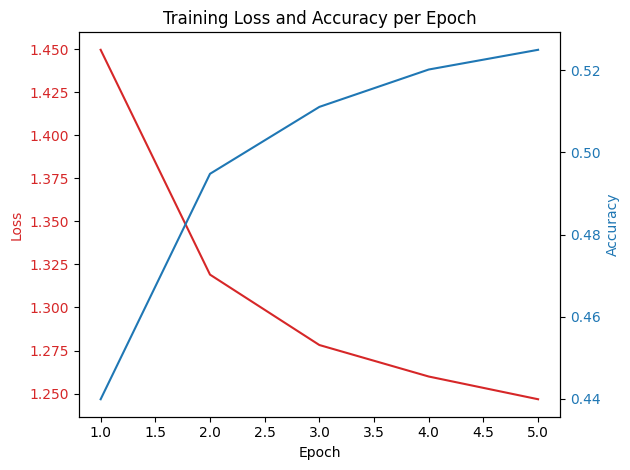

In [32]:
# Data from your output
epochs = [1, 2, 3, 4, 5]
loss = [1.4497, 1.3191, 1.2782, 1.2599, 1.2467]
accuracy = [0.4399, 0.4948, 0.5111, 0.5202, 0.5250]

# Create plots
fig, ax1 = plt.subplots()

# Plotting the loss on the left y-axis
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, loss, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Creating a second y-axis to plot accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, accuracy, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and legend
plt.title('Training Loss and Accuracy per Epoch')
fig.tight_layout()

# Show plot
plt.show()


Overview of the Answer to Question 3

Model Selection: I selected a BERT model from TensorFlow Hub (small_bert/bert_en_uncased_L-4_H-512_A-8), which is a smaller variant of BERT designed for environments where model size and speed are a concern. This model retains much of the original BERT's language understanding capabilities but with fewer parameters.

Preprocessing and Inputs: The BERT preprocessor transforms the text into a format suitable for the model, handling tasks like tokenization and encoding.

Training Configuration: The model is trained with a sigmoid activation function on the final layer adapted for multi-class classification, with the data one-hot encoded for each of the six emotion categories.

Analysis of Results

Training Dynamics:

- The training loss starts at 1.4497 and gradually decreases to 1.2467 by the end of the fifth epoch. This steady decrease indicates that the model is learning effectively, optimizing its weights to reduce the prediction error.
Correspondingly, the training accuracy improves from 43.99% to 52.50%. While the improvement trajectory is positive, the absolute values suggest that there is significant room for improvement. This might be partly due to the limited number of epochs, which are fewer than typically used for deep learning models, especially complex ones like BERT.

- Validation Performance:
The model achieves a validation accuracy of 53.85%, which is slightly higher than the final training accuracy. This close alignment of training and validation metrics suggests that the model is generalizing well to unseen data without overfitting significantly.
Insights and Considerations

- Computational Limitations: I noted the use of only 5 epochs due to time constraints, which is a practical limitation often encountered in real-world scenarios. BERT models are computationally expensive, and extending the number of epochs could potentially improve performance but at the cost of increased training time.

Potential for Further Improvement:

- Increasing Epochs: More training epochs could help the model to better refine its weights and biases, potentially leading to higher accuracies.
Hyperparameter Tuning: Adjusting learning rates, batch sizes, and other hyperparameters could also yield improvements.

- Model Size and Complexity: Exploring larger or different variants of BERT might capture more complex patterns in the data, although this comes with additional computational costs.

Conclusion

The results demonstrate a successful application of transfer learning through the adaptation of a pretrained BERT model to a specific task. However, the moderate performance underscores the challenges of balancing model complexity, training time, and computational resources. Future experiments with extended training, more complex models, or additional data augmentation might further unlock the potential of BERT for emotion classification.

# Question 4 (10 points)

Now let's try some state-of-the-art Large Language Models (LLM)! Cohere provides trial API for free and you may register and use the LLM. After you obtain the trial API, go to https://dashboard.cohere.com/playground/classify and see how the LLM-based classification works. You could choose several pretrained embedding models such as embed-engligh-2.0 or embed-engligh-3.0 and provide example training data. Evaluate the model performance.

In [33]:
!pip install cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depend

In [54]:
# Performing with 3 labels
# Initialize the Cohere client with your API key
co = cohere.Client('ZBUukNIC4RQUKhptkS3m3pfmmi7Z9EseRdswV6l9')

# Example texts for classification
inputs = [
    "I watch the soccer match",
    "I went to the concert",
    "I recently joined a sports club",
    "I learned a new song on the piano",
    "I love going to cafes",
    "I enjoy hiking on weekends"
]

# Training data examples defined as dictionaries
examples = [
    {"text": "I love playing football", "label": "sports"},
    {"text": "I play in a band", "label": "music"},
    {"text": "The Champions League game was thrilling", "label": "sports"},
    {"text": "My favorite instrument to play is guitar", "label": "music"},
    {"text": "I enjoy listening to classical music", "label": "music"},
    {"text": "Yesterday I scored a goal", "label": "sports"},
    {"text": "I like to relax in the park", "label": "lifestyle"},
    {"text": "Weekends are for coffee and books", "label": "lifestyle"}
]

# Perform classification using a specific model
response = co.classify(
    model='embed-english-v3.0',
    inputs=inputs,
    examples=examples
)
print("3 labels with embed-english-v3.0")
# Output the classification results and their confidence levels
for i, classification in enumerate(response.classifications):
    print(f"Input: {inputs[i]}")
    print(f"Predicted label: {classification.prediction}")
    print(f"Confidence levels: {classification.confidences}")
    print()


3 labels with embed-english-v3.0
Input: I watch the soccer match
Predicted label: sports
Confidence levels: [0.4697604]

Input: I went to the concert
Predicted label: music
Confidence levels: [0.42514113]

Input: I recently joined a sports club
Predicted label: sports
Confidence levels: [0.44417247]

Input: I learned a new song on the piano
Predicted label: music
Confidence levels: [0.4280732]

Input: I love going to cafes
Predicted label: sports
Confidence levels: [0.3521311]

Input: I enjoy hiking on weekends
Predicted label: lifestyle
Confidence levels: [0.3478968]



In [55]:
# Performing with 4 labels

# Initialize the Cohere client with your API key
co = cohere.Client('ZBUukNIC4RQUKhptkS3m3pfmmi7Z9EseRdswV6l9')

# Example texts for classification
inputs = [
    "I watch the soccer match",
    "I went to the concert",
    "I recently joined a sports club",
    "I learned a new song on the piano",
    "I love going to cafes",
    "I enjoy hiking on weekends",
    "I built a new app using Python",
    "I updated my computer's hardware"
]

# Training data examples defined as dictionaries
examples = [
    {"text": "I love playing football", "label": "sports"},
    {"text": "I play in a band", "label": "music"},
    {"text": "The Champions League game was thrilling", "label": "sports"},
    {"text": "My favorite instrument to play is guitar", "label": "music"},
    {"text": "I enjoy listening to classical music", "label": "music"},
    {"text": "Yesterday I scored a goal", "label": "sports"},
    {"text": "I like to relax in the park", "label": "lifestyle"},
    {"text": "Weekends are for coffee and books", "label": "lifestyle"},
    {"text": "Developing software solutions is my passion", "label": "technology"},
    {"text": "I troubleshoot computer issues", "label": "technology"}
]

# Perform classification using a specific model
response = co.classify(
    model='embed-english-v3.0',
    inputs=inputs,
    examples=examples
)

print("4 labels with embed-english-v3.0")
# Output the classification results and their confidence levels
for i, classification in enumerate(response.classifications):
    print(f"Input: {inputs[i]}")
    print(f"Predicted label: {classification.prediction}")
    print(f"Confidence levels: {classification.confidences}")
    print()


4 labels with embed-english-v3.0
Input: I watch the soccer match
Predicted label: sports
Confidence levels: [0.39741236]

Input: I went to the concert
Predicted label: music
Confidence levels: [0.35621715]

Input: I recently joined a sports club
Predicted label: sports
Confidence levels: [0.3706161]

Input: I learned a new song on the piano
Predicted label: music
Confidence levels: [0.3508478]

Input: I love going to cafes
Predicted label: sports
Confidence levels: [0.2892756]

Input: I enjoy hiking on weekends
Predicted label: lifestyle
Confidence levels: [0.28993225]

Input: I built a new app using Python
Predicted label: sports
Confidence levels: [0.2871944]

Input: I updated my computer's hardware
Predicted label: technology
Confidence levels: [0.2825891]



In [56]:
# Performing with 5 labels
# Initialize the Cohere client with your API key
co = cohere.Client('ZBUukNIC4RQUKhptkS3m3pfmmi7Z9EseRdswV6l9')

# Example texts for classification
inputs = [
    "I watch the soccer match",
    "I went to the concert",
    "I recently joined a sports club",
    "I learned a new song on the piano",
    "I love going to cafes",
    "I enjoy hiking on weekends",
    "I built a new app using Python",
    "I updated my computer's hardware",
    "I am studying for my final exams",
    "I attended a seminar on climate change"
]

# Training data examples defined as dictionaries
examples = [
    {"text": "I love playing football", "label": "sports"},
    {"text": "I play in a band", "label": "music"},
    {"text": "The Champions League game was thrilling", "label": "sports"},
    {"text": "My favorite instrument to play is guitar", "label": "music"},
    {"text": "I enjoy listening to classical music", "label": "music"},
    {"text": "Yesterday I scored a goal", "label": "sports"},
    {"text": "I like to relax in the park", "label": "lifestyle"},
    {"text": "Weekends are for coffee and books", "label": "lifestyle"},
    {"text": "Developing software solutions is my passion", "label": "technology"},
    {"text": "I troubleshoot computer issues", "label": "technology"},
    {"text": "Learning new things excites me", "label": "education"},
    {"text": "I teach mathematics", "label": "education"}
]

# Perform classification using a specific model
response = co.classify(
    model='embed-english-v3.0',
    inputs=inputs,
    examples=examples
)
print("5 labels with embed-english-v3.0")
# Output the classification results and their confidence levels
for i, classification in enumerate(response.classifications):
    print(f"Input: {inputs[i]}")
    print(f"Predicted label: {classification.prediction}")
    print(f"Confidence levels: {classification.confidences}")
    print()

5 labels with embed-english-v3.0
Input: I watch the soccer match
Predicted label: sports
Confidence levels: [0.34227923]

Input: I went to the concert
Predicted label: music
Confidence levels: [0.3049308]

Input: I recently joined a sports club
Predicted label: sports
Confidence levels: [0.31314555]

Input: I learned a new song on the piano
Predicted label: music
Confidence levels: [0.28788072]

Input: I love going to cafes
Predicted label: sports
Confidence levels: [0.24266636]

Input: I enjoy hiking on weekends
Predicted label: lifestyle
Confidence levels: [0.24660033]

Input: I built a new app using Python
Predicted label: sports
Confidence levels: [0.23887874]

Input: I updated my computer's hardware
Predicted label: technology
Confidence levels: [0.23491745]

Input: I am studying for my final exams
Predicted label: music
Confidence levels: [0.23421627]

Input: I attended a seminar on climate change
Predicted label: sports
Confidence levels: [0.2260412]



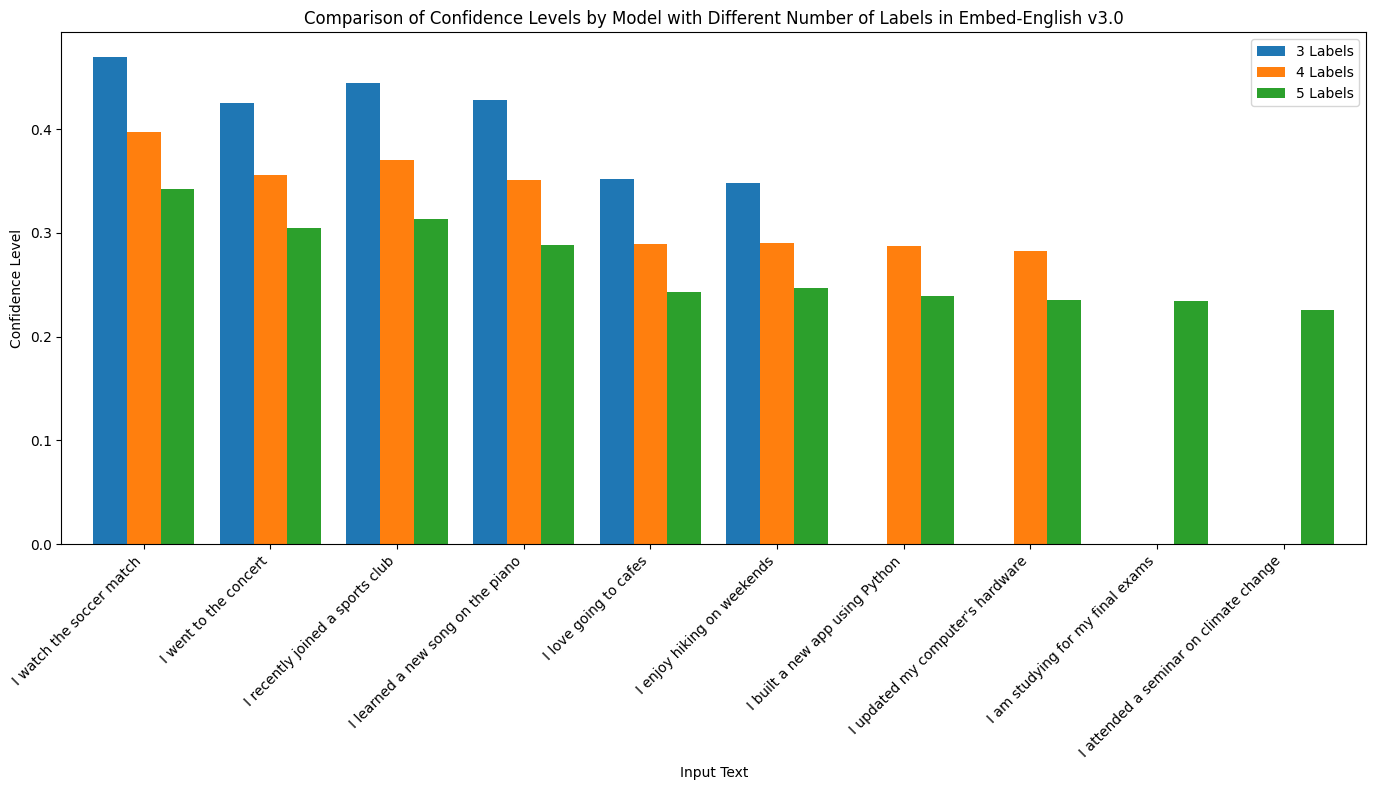

In [62]:
# Define the data
data = {
    'Input': [
        "I watch the soccer match", "I went to the concert", "I recently joined a sports club",
        "I learned a new song on the piano", "I love going to cafes", "I enjoy hiking on weekends",
        "I built a new app using Python", "I updated my computer's hardware", "I am studying for my final exams",
        "I attended a seminar on climate change"
    ],
    '3 Labels': [0.4697604, 0.42514113, 0.44417247, 0.4280732, 0.3521311, 0.3478968, None, None, None, None],
    '4 Labels': [0.39741236, 0.35621715, 0.3706161, 0.3508478, 0.2892756, 0.28993225, 0.2871944, 0.2825891, None, None],
    '5 Labels': [0.34227923, 0.3049308, 0.31314555, 0.28788072, 0.24266636, 0.24660033, 0.23887874, 0.23491745, 0.23421627, 0.2260412]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the data
ax = df.set_index('Input').plot(kind='bar', figsize=(14, 8), width=0.8)
ax.set_title('Comparison of Confidence Levels by Model with Different Number of Labels in Embed-English v3.0')
ax.set_ylabel('Confidence Level')
ax.set_xlabel('Input Text')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [57]:
# Performing with 2 labels

# Initialize the Cohere client with your API key
co = cohere.Client('ZBUukNIC4RQUKhptkS3m3pfmmi7Z9EseRdswV6l9')

# Example texts for classification
inputs = [
    "I watch the soccer match",
    "I went to the concert",
    "I recently joined a sports club",
    "I learned a new song on the piano"
]

# Training data examples defined as dictionaries
examples = [
    {"text": "I love playing football", "label": "sports"},
    {"text": "I play in a band", "label": "music"},
    {"text": "The Champions League game was thrilling", "label": "sports"},
    {"text": "My favorite instrument to play is guitar", "label": "music"},
    {"text": "I enjoy listening to classical music", "label": "music"},
    {"text": "Yesterday I scored a goal", "label": "sports"}
]

# Perform classification using a specific model
response = co.classify(
    model='embed-english-v2.0',
    inputs=inputs,
    examples=examples  # Corrected the argument here
)
print("2 labels with embed-english-v2.0")
# Output the classification results and their confidence levels
for i, classification in enumerate(response.classifications):
    print(f"Input: {inputs[i]}")
    print(f"Predicted label: {classification.prediction}")
    print(f"Confidence levels: {classification.confidences}")

2 labels with embed-english-v2.0
Input: I watch the soccer match
Predicted label: sports
Confidence levels: [0.98799753]
Input: I went to the concert
Predicted label: music
Confidence levels: [0.66750276]
Input: I recently joined a sports club
Predicted label: sports
Confidence levels: [0.9116125]
Input: I learned a new song on the piano
Predicted label: music
Confidence levels: [0.8382851]


In [58]:
# Performing with 3 labels

# Initialize the Cohere client with your API key
co = cohere.Client('ZBUukNIC4RQUKhptkS3m3pfmmi7Z9EseRdswV6l9')

# Example texts for classification
inputs = [
    "I watch the soccer match",
    "I went to the concert",
    "I recently joined a sports club",
    "I learned a new song on the piano",
    "I traveled to Paris last summer",
    "I am planning a trip to Japan"
]

# Training data examples defined as dictionaries
examples = [
    {"text": "I love playing football", "label": "sports"},
    {"text": "I play in a band", "label": "music"},
    {"text": "The Champions League game was thrilling", "label": "sports"},
    {"text": "My favorite instrument to play is guitar", "label": "music"},
    {"text": "I enjoy listening to classical music", "label": "music"},
    {"text": "Yesterday I scored a goal", "label": "sports"},
    {"text": "Exploring new cities is my hobby", "label": "travel"},
    {"text": "I booked a flight to Italy", "label": "travel"}
]

# Perform classification using a specific model
response = co.classify(
    model='embed-english-v2.0',
    inputs=inputs,
    examples=examples
)
print("2 labels with embed-english-v2.0")
# Output the classification results and their confidence levels
for i, classification in enumerate(response.classifications):
    print(f"Input: {inputs[i]}")
    print(f"Predicted label: {classification.prediction}")
    print(f"Confidence levels: {classification.confidences}")
    print()


2 labels with embed-english-v2.0
Input: I watch the soccer match
Predicted label: sports
Confidence levels: [0.97923356]

Input: I went to the concert
Predicted label: music
Confidence levels: [0.69312596]

Input: I recently joined a sports club
Predicted label: sports
Confidence levels: [0.85088956]

Input: I learned a new song on the piano
Predicted label: music
Confidence levels: [0.8171341]

Input: I traveled to Paris last summer
Predicted label: travel
Confidence levels: [0.9928271]

Input: I am planning a trip to Japan
Predicted label: travel
Confidence levels: [0.9705894]



In [59]:
# Performing with 5 labels

# Initialize the Cohere client with your API key
co = cohere.Client('ZBUukNIC4RQUKhptkS3m3pfmmi7Z9EseRdswV6l9')

# Example texts for classification
inputs = [
    "I watch the soccer match",
    "I went to the concert",
    "I recently joined a sports club",
    "I learned a new song on the piano",
    "I traveled to Paris last summer",
    "I am planning a trip to Japan",
    "I am studying for my finals",
    "I attended a workshop on AI"
]

# Training data examples defined as dictionaries
examples = [
    {"text": "I love playing football", "label": "sports"},
    {"text": "I play in a band", "label": "music"},
    {"text": "The Champions League game was thrilling", "label": "sports"},
    {"text": "My favorite instrument to play is guitar", "label": "music"},
    {"text": "I enjoy listening to classical music", "label": "music"},
    {"text": "Yesterday I scored a goal", "label": "sports"},
    {"text": "Exploring new cities is my hobby", "label": "travel"},
    {"text": "I booked a flight to Italy", "label": "travel"},
    {"text": "I am doing research on quantum computing", "label": "education"},
    {"text": "I tutor students in chemistry", "label": "education"}
]

# Perform classification using a specific model
response = co.classify(
    model='embed-english-v2.0',
    inputs=inputs,
    examples=examples
)
print("4 labels with embed-english-v3.0")
# Output the classification results and their confidence levels
for i, classification in enumerate(response.classifications):
    print(f"Input: {inputs[i]}")
    print(f"Predicted label: {classification.prediction}")
    print(f"Confidence levels: {classification.confidences}")
    print()


4 labels with embed-english-v3.0
Input: I watch the soccer match
Predicted label: sports
Confidence levels: [0.9789005]

Input: I went to the concert
Predicted label: music
Confidence levels: [0.6808219]

Input: I recently joined a sports club
Predicted label: sports
Confidence levels: [0.82257855]

Input: I learned a new song on the piano
Predicted label: music
Confidence levels: [0.77864903]

Input: I traveled to Paris last summer
Predicted label: travel
Confidence levels: [0.98975307]

Input: I am planning a trip to Japan
Predicted label: travel
Confidence levels: [0.9089811]

Input: I am studying for my finals
Predicted label: education
Confidence levels: [0.6641077]

Input: I attended a workshop on AI
Predicted label: education
Confidence levels: [0.68996537]



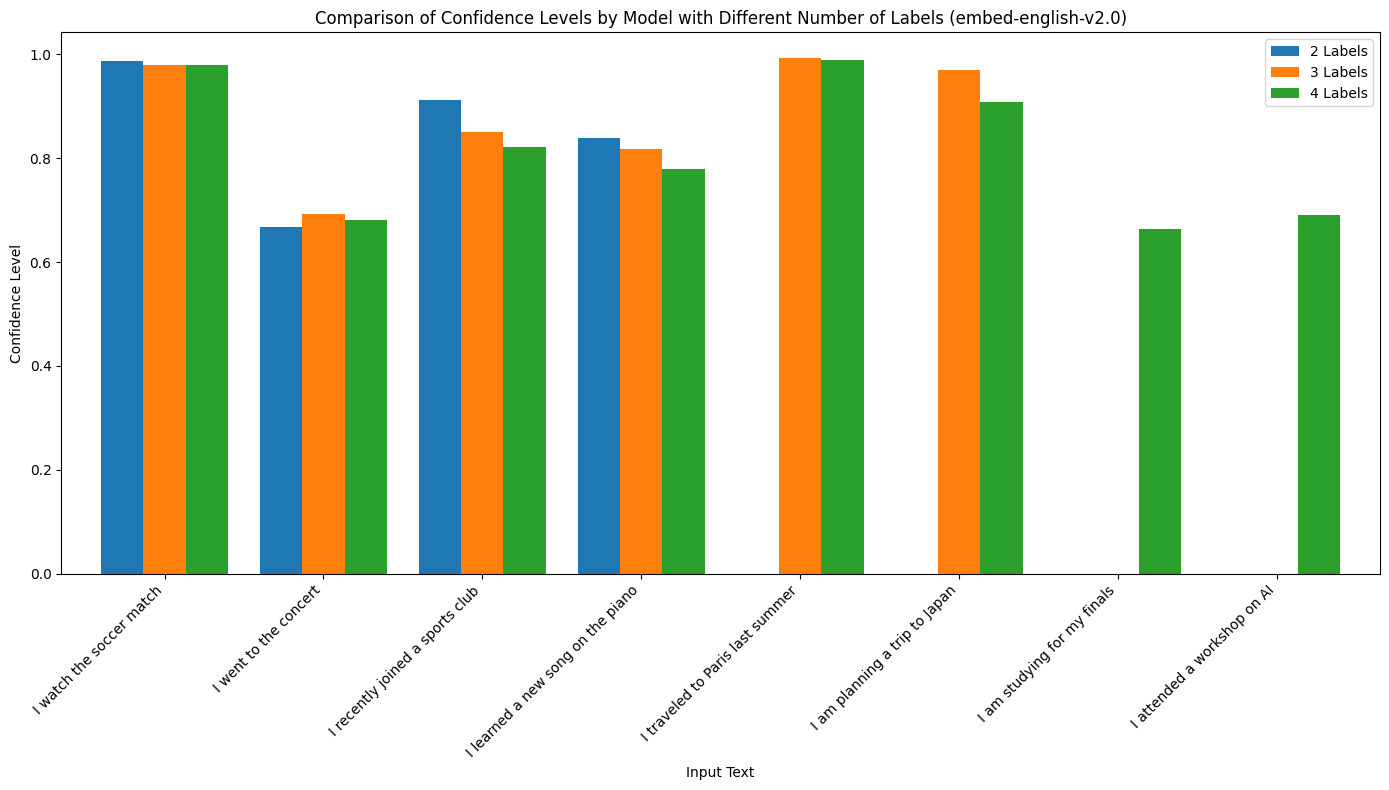

In [61]:
# Define the data for different label configurations
data = {
    'Input': [
        "I watch the soccer match", "I went to the concert", "I recently joined a sports club",
        "I learned a new song on the piano", "I traveled to Paris last summer", "I am planning a trip to Japan",
        "I am studying for my finals", "I attended a workshop on AI"
    ],
    '2 Labels': [0.98799753, 0.66750276, 0.9116125, 0.8382851, None, None, None, None],
    '3 Labels': [0.97923356, 0.69312596, 0.85088956, 0.8171341, 0.9928271, 0.9705894, None, None],
    '4 Labels': [0.9789005, 0.6808219, 0.82257855, 0.77864903, 0.98975307, 0.9089811, 0.6641077, 0.68996537]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the data
ax = df.set_index('Input').plot(kind='bar', figsize=(14, 8), width=0.8)
ax.set_title('Comparison of Confidence Levels by Model with Different Number of Labels in Embed-English-v2.0)')
ax.set_ylabel('Confidence Level')
ax.set_xlabel('Input Text')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Analysis of the Results for Question 4

General Trend:

- Increased Number of Labels Reduces Confidence: There's a general trend where the model's confidence decreases as the number of labels increases. This is expected as more labels introduce more complexity and uncertainty into the classification task.

Conclusions:

- Sports-related Inputs: Inputs related to sports like "I watch the soccer match" consistently show higher confidence across different label scenarios, indicating robust model training in this domain.

- Music and Lifestyle Categories: Similar to sports, inputs related to music ("I went to the concert") and lifestyle activities ("I enjoy hiking on weekends") show reasonably high confidence. However, these dip more noticeably as the label count increases, which might suggest that these areas could benefit from more training data or clearer distinction in the training examples.

- Misclassifications in Broader Contexts: Misclassifications seem to occur in contexts where inputs might be vague or less directly related to the training examples, such as "I love going to cafes" being classified under sports in higher label scenarios. This suggests potential overfitting to certain labels or insufficient data to learn broader contexts. Would love to do more experiences with even more training data for different label configurations but couldn't have time to do even more.

Confidence Levels with Different Embedding Models:

- The first chart using Embed-English v3.0 generally shows a spread of confidence levels with a notable drop as the number of labels increases. The highest confidence is often not very high, reflecting cautious predictions.

- The second chart with Embed-English v2.0 reveals a pattern where the confidence levels are not only generally lower compared to the v3.0 model but also show a sharper decrease with the increase in label categories.

Implications

- Model Training and Data Quality: The results underscore the importance of the quality and quantity of training data. More nuanced or diverse examples might help improve the model's confidence across a broader range of inputs.

- Label Granularity: The model's performance could potentially be improved by redefining label categories to ensure that they are mutually exclusive and collectively exhaustive, reducing ambiguity in classification tasks.

- Model Tuning: Adjusting model parameters or using advanced techniques like transfer learning with more extensive pre-trained models might also help enhance performance, especially in a multi-label context.

Final Considerations

The exploration of model confidence across different scenarios provides valuable insights into how machine learning models handle complexity and ambiguity. It highlights the importance of precise training data and the need for robust model evaluation metrics to ensure that the models perform well across all expected input variations.